In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot') 

import sys
sys.path.append("../")
import kang

In [147]:
df_cds_crenew_index          = pd.read_pickle('../../braker/cre.cds.braker.chlamy20151203.augustus.gff.rmsharp.gff.parsed.gff.p')
df_cds_crenew                = df_cds_crenew_index.reset_index()
df_crenew_gene,df_crenew_cds = get_df_gff('../../braker/braker.chlamy20151203.augustus.gff.rmsharp.gff.parsed.gff')

mask                         = (df_cds_crenew['transcript'] == 't1')
df_cds_crenew_gene           = df_cds_crenew[mask]

crenew_genenum               = len(df_cds_crenew_gene)
cds_len_list_crenew          = np.array([len(x) for x in df_cds_crenew_gene['CDSseq']])

In [210]:
df_cds_crenew_index

,,CDSloc,CDSseq,strand,transcriptname
gene,transcript,,,,
g13850,t1,"[(98824, 99150)]",ATGAATCAGCGCGGAGAGCTGCACGTGCACGGCTGTATCTGGCAGC...,+,g13850.t1
g3773,t1,"[(5877390, 5877487), (5877942, 5878057), (5878...",ATGGAAGTCCAGCGGCTGCTGTATCTGCTTGAGGCGCCTGAGTACG...,-,g3773.t1
g14854,t1,"[(1544428, 1544481), (1544830, 1545210), (1545...",ATGTCGCGCTGGCCCCGCACAGACCTCATCGACCCACATGGCGGCG...,+,g14854.t1
g12808,t1,"[(4704406, 4704744), (4705127, 4705312), (4705...",ATGCCGCCGCGCATCCAAAATGTGAACGCTGCGGGAACGGGTGTAG...,-,g12808.t1
g3484,t1,"[(3968836, 3968863), (3969014, 3969090), (3969...",ATGACCGACATCAAGGATGCCCGTGGAAGTGTGGCGTCCTTCAAGC...,+,g3484.t1
g5589,t1,"[(2460944, 2461036), (2461659, 2461752), (2462...",ATGTCAGAGCTTGAGCTTGAGGAGGTGGAGCGGAGCCTGCGGAACG...,+,g5589.t1
g17963,t1,"[(593886, 593933), (594239, 594400), (594625, ...",ATGGAGCGCGTCAGCAACTCAGGCGGCAGCCGAAAGGCCTTTGCCA...,+,g17963.t1
g875,t1,"[(5528721, 5529569), (5529688, 5529798), (5529...",ATGAAGGCCACGCAGATCATCGGTGTGGACCCGTGCGGGGGAGGGA...,+,g875.t1
g10855,t1,"[(3853485, 3853784), (3854063, 3854299), (3855...",ATGGGGCGAGACCTCCCGCAGCGGACAACGCGCGGCCGGCGCATGG...,-,g10855.t1


In [100]:
file_fa_cds_cre = '../../../Cre/DroughtNet/PhytozomeV10_download/PhytozomeV10/Creinhardtii/annotation/Creinhardtii_281_v5.5.cds_primaryTranscriptOnly.fa'
dicHD2seq_cre = kang.Fasta2dic(file_fa_cds_cre)
cds_len_list_cre = np.array([len(x) for x in dicHD2seq_cre.values()])
cre_genenum = len(dicHD2seq_cre.keys())

file_fa_cds_ath = '../../../Cre/DroughtNet/PhytozomeV10_download/PhytozomeV10/Athaliana/annotation/Athaliana_167_TAIR10.cds_primaryTranscriptOnly.fa'
dicHD2seq_ath = kang.Fasta2dic(file_fa_cds_ath)
cds_len_list_ath = np.array([len(x) for x in dicHD2seq_ath.values()])
ath_genenum = len(dicHD2seq_ath.keys())

In [180]:
HD_list = ['.'.join(x.split('.')[0:2]) for x in dicHD2seq_cre.keys()]
dicHD2seq_cre_genename = dict(zip(HD_list,dicHD2seq_cre.values()))

In [11]:
def get_df_gff(file_gff):
    #file_gff_ori = '../../genemodel_correction/Creinhardtii_281_v5.5.gene.gff3'
    df_ori = pd.read_csv(file_gff,sep='\t',header=None,skiprows=2)
    df_ori_gene = df_ori[df_ori[2]=='gene'] 
    df_ori_cds = df_ori[df_ori[2]=='CDS'] 
    df_ori_gene['length'] = df_ori_gene.apply(lambda x : x[4] - x[3],axis=1)
    df_ori_cds['length'] = df_ori_cds.apply(lambda x : x[4] - x[3],axis=1)
    return df_ori_gene, df_ori_cds
df_cre_gene,df_cre_cds = get_df_gff('../../genemodel_correction/Creinhardtii_281_v5.5.gene.gff3')
df_ath_gene,df_ath_cds = get_df_gff('../../DroughtNet/PhytozomeV10_download/PhytozomeV10/Athaliana/annotation/Athaliana_167_TAIR10.gene.gff3')

df_cre_gene['genename'] = df_cre_gene[8].apply(lambda x : x.split(';')[1].replace('Name=',''))
df_cre_gene_index = df_cre_gene.set_index('genename')

In [168]:
df_cre_gene_index.head()

,0,1,2,3,4,5,6,7,8,length
genename,,,,,,,,,,
Cre01.g000017,chromosome_1,phytozomev10,gene,18766,20237,.,+,.,ID=Cre01.g000017.v5.5;Name=Cre01.g000017,1471
Cre01.g000033,chromosome_1,phytozomev10,gene,20356,23957,.,+,.,ID=Cre01.g000033.v5.5;Name=Cre01.g000033,3601
Cre01.g000050,chromosome_1,phytozomev10,gene,24026,30617,.,+,.,ID=Cre01.g000050.v5.5;Name=Cre01.g000050,6591
Cre01.g000100,chromosome_1,phytozomev10,gene,30776,41037,.,+,.,ID=Cre01.g000100.v5.5;Name=Cre01.g000100,10261
Cre01.g000150,chromosome_1,phytozomev10,gene,41896,46547,.,+,.,ID=Cre01.g000150.v5.5;Name=Cre01.g000150,4651


In [205]:
def get_two_hist(ax1,ax2,array1,array2,xlim,title):
    a1,b1,c1 = ax1.hist(array1,bins=np.arange(0,max(array1),1),histtype='step',alpha=0.7)
    a2,b2,c2 = ax1.hist(array2,bins=np.arange(0,max(array1),1),histtype='step',alpha=0.7)
    ax1.set_xlim(0,xlim)
    ax1.set_title(title)
    ax1.set_xlabel('Length (bp)')
    ax1.set_ylabel('Count')
    ax2.plot(b1[0:len(a1)],a1/ath_genenum,alpha=0.8)
    ax2.plot(b2[0:len(a2)],a2/cre_genenum,alpha=0.8)
    ax2.set_xlim(0,xlim)
    ax2.set_title(title)
    ax2.set_xlabel('Length (bp)')
    ax2.set_ylabel('Ratio (Count/total # genes)')
    if title == 'Gene' or title == 'Gene_covs':
        ax1.set_ylim(0,35)
        ax2.set_ylim(0,0.0014)

In [229]:
# genelist of gene with bam coverage
df_table = pd.read_pickle('../../genemodel_correction/tophat/cre.genemodelcomp.total.addRNAseqpairedendcov.pk')

mask                            = (df_table['Genecov'] > 0.99)
genelist_genecov                = df_table[mask]['genename']
array_genelen_genelist_gene_cov = [df_cre_gene_index.loc[x]['length'] for x in genelist_genecov]
array_cdslen_genelist_gene_cov  = [len(dicHD2seq_cre_genename[x]) for x in genelist_genecov]
print len(genelist_genecov)

7856


In [230]:
df_table_new = pd.read_pickle('../../genemodel_correction/tophat/cre.genemodelcomp.newgenemodel.addRNAseqpairedendcov.pk')

mask                                = (df_table_new['Genecov'] > 0.99)
genelist_genecov_new                = df_table_new[mask]['genename']
array_genelen_genelist_gene_cov_new = list(df_table_new['length'])
array_cdslen_genelist_gene_cov_new  = [len(df_cds_crenew_index.loc[(x,'t1')]['CDSseq']) for x in genelist_genecov_new]
print len(genelist_genecov_new)

11158


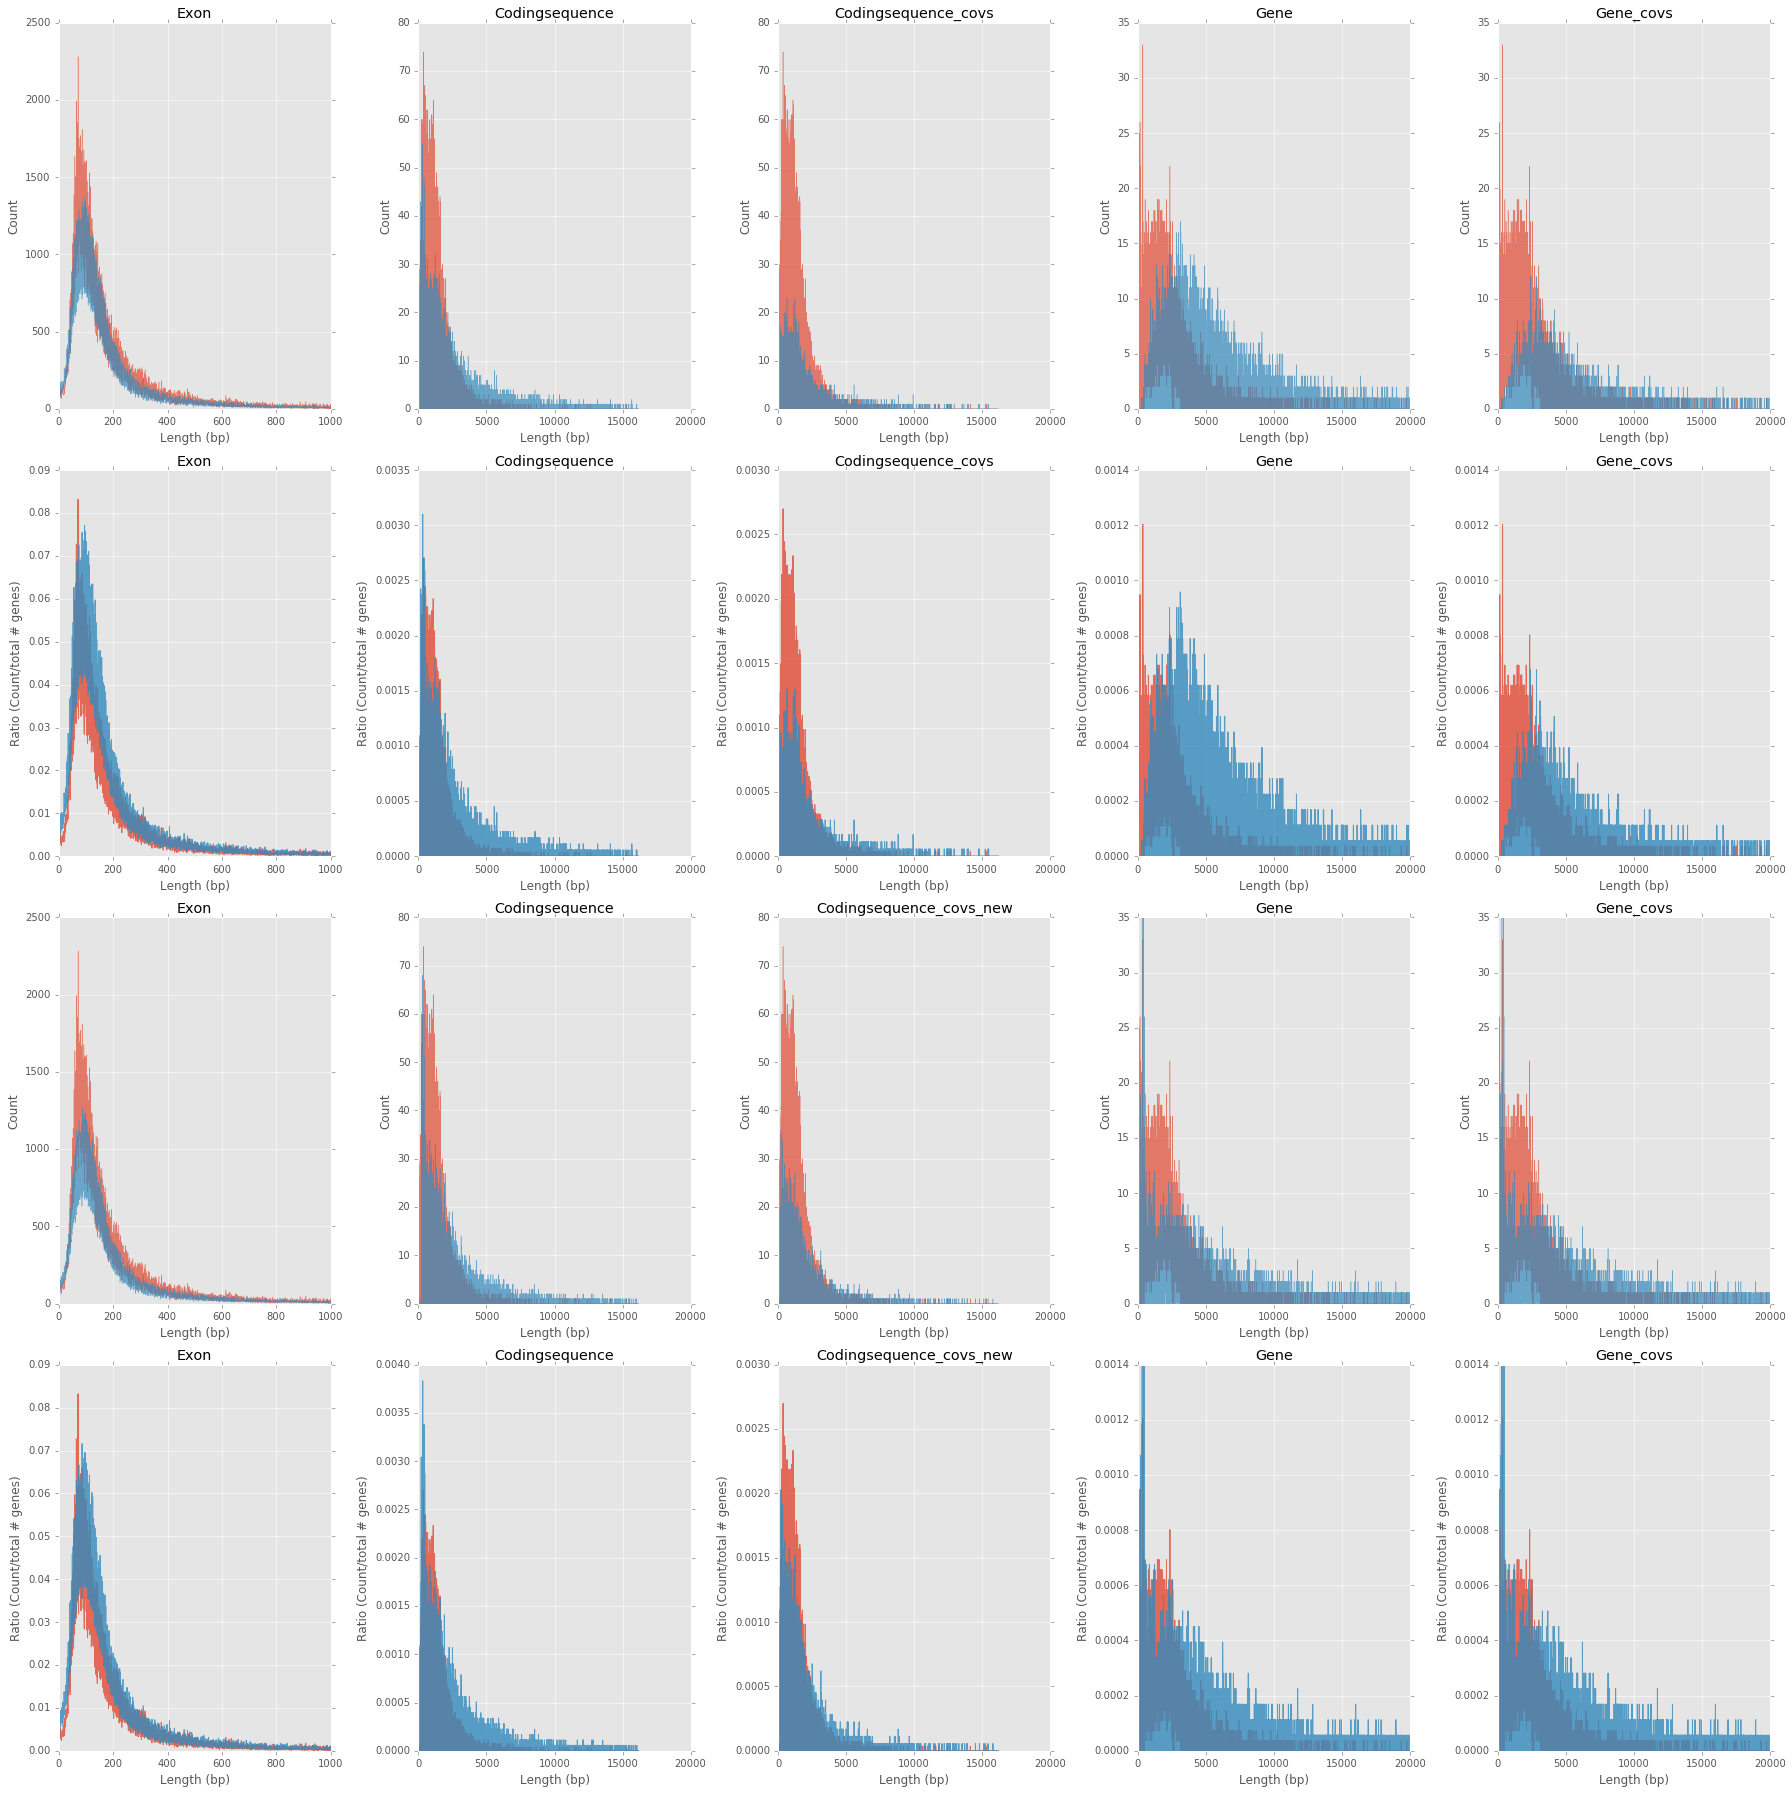

In [231]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,5,figsize=(25, 25))

get_two_hist(ax1[0],ax2[0],df_ath_cds['length'],df_cre_cds['length'],1000,'Exon')
get_two_hist(ax3[0],ax4[0],df_ath_cds['length'],df_crenew_cds['length'],1000,'Exon')

get_two_hist(ax1[1],ax2[1],cds_len_list_ath,cds_len_list_cre,20000,'Codingsequence')
get_two_hist(ax3[1],ax4[1],cds_len_list_ath,cds_len_list_crenew,20000,'Codingsequence')
get_two_hist(ax1[2],ax2[2],cds_len_list_ath,array_cdslen_genelist_gene_cov,20000,'Codingsequence_covs')
get_two_hist(ax3[2],ax4[2],cds_len_list_ath,array_cdslen_genelist_gene_cov_new,20000,'Codingsequence_covs_new')

get_two_hist(ax1[3],ax2[3],df_ath_gene['length'],df_cre_gene['length'],20000,'Gene')
get_two_hist(ax3[3],ax4[3],df_ath_gene['length'],df_crenew_gene['length'],20000,'Gene')
get_two_hist(ax1[4],ax2[4],df_ath_gene['length'],array_genelen_genelist_gene_cov,20000,'Gene_covs')
get_two_hist(ax3[4],ax4[4],df_ath_gene['length'],array_genelen_genelist_gene_cov_new,20000,'Gene_covs')

plt.tight_layout()

pp = PdfPages('cre.lengthcomp.exonvsgene.pdf')
plt.savefig(pp, format='pdf')
pp.close()

In [89]:
max(cds_len_list_cre)

71580

In [91]:
max(df_cre_gene['length'])

108751